ML Model Implementation

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#from sklearn.metrics import r2_score as r2, mean_Squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
df = pd.read_csv('cleandata.csv')

In [3]:
#defining dependent variable
dependent_variables = 'Sales'

independent_variables = list(df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [4]:
#List of Independent Variable
independent_variables

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [5]:
#create the data of independent variables
x = df[independent_variables].values

#create the data of dependent variable
y=df[dependent_variables].values

In [6]:
# splitting the dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(675513, 18)
(168879, 18)


In [7]:
# here we trai the model
reg = LinearRegression().fit(x_train, y_train)

In [8]:
reg.score(x_train,y_train)

0.6795568115538986

In [9]:
reg.coef_

array([-1.45397782e-01,  2.34845576e+02,  2.04307897e+02,  2.28886069e-02,
        2.60489798e+01,  1.29698174e+00, -8.53671671e+01,  1.26890074e+01,
       -6.05266211e+01,  4.69990325e+00, -7.95807864e-13,  1.34132460e+03,
       -1.26705576e+03,  4.46472262e+01,  8.53671671e+01,  2.08236174e+01,
        1.26393222e+02, -2.32584007e+02])

In [10]:
# checking the intercept of different independent columns
reg.intercept_

-600.5168585368783

In [11]:
#predicting Dependent variables with Test Dataset i.e 20%
y_pred = reg.predict(x_test)
y_pred

array([6849.64878156, 6133.03442279, 7810.01236917, ..., 5998.20238281,
       5691.1710543 , 5356.8604298 ])

In [12]:
#original test dependent value
y_test

array([6859, 4066, 8676, ..., 7592, 7519, 5838], dtype=int64)

In [13]:
#predicting on Train Dataset
y_pred_train = reg.predict(x_train)
y_pred_train

array([4847.8063929 , 7834.88613788, 7247.1461428 , ..., 7594.78081843,
       8754.58777684, 6597.21384608])

In [14]:
#Dependent Variable with Train Dataset i.e 80%
y_train

array([3532, 6927, 6365, ..., 9628, 8470, 5905], dtype=int64)

In [15]:
#calculate MSE & RMSE for Test prediction
MSE = mean_squared_error(y_test, y_pred)
print('MSE :' , MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

MSE : 2101191.8636998036
RMSE : 1449.5488483317158


In [16]:
# calculate the R-squared score between the true target values (y_test) and the predicted values
r2 = r2_score(y_test, y_pred)
print('R2 :',r2)

R2 : 0.6785344774587754


In [17]:
#true target values (y_test) and the corresponding predicted values (y_pred) side by side.
pd.DataFrame(zip(y_test, y_pred), columns= ['actual','pred'])

,actual,pred
0,6859,6849.648782
1,4066,6133.034423
2,8676,7810.012369
3,10004,9516.682717
4,12137,13567.018540
...,...,...
168874,7867,7409.525233
168875,2493,4063.930750
168876,7592,5998.202383
168877,7519,5691.171054


SHAP & LIME

In [18]:
import shap
import lime
import lime.lime_tabular

In [19]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


c:\Users\hp\anaconda\Lib\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

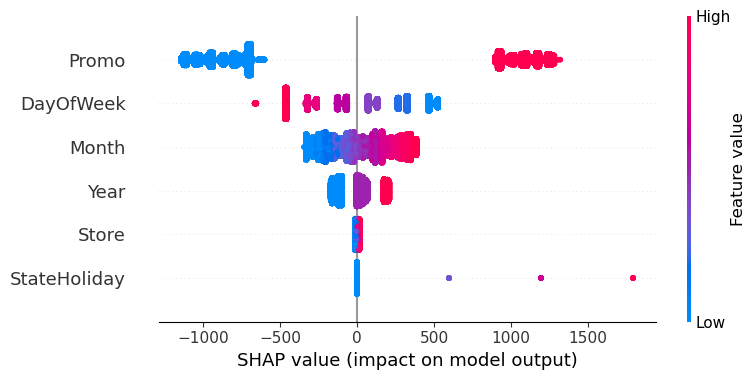

[('Year > 2014.00', 201863.501996953), ('StateHoliday <= 0.00', -60877.644220744354), ('Month <= 3.00', 10332.07501351222), ('Promo <= 0.00', -4349.3225869297785)]


c:\Users\hp\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap
import lime.lime_tabular

# Feature and target extraction
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'Year', 'Month']
x = df[features]
y = df['Sales']

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# SHAP Explainer
explainer = shap.LinearExplainer(model, x_train, feature_perturbation='correlation_dependent')
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

# LIME Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train.values, feature_names=x_train.columns, class_names=['Sales'], mode='regression'
)
exp = lime_explainer.explain_instance(x_test.values[0], model.predict, num_features=4)
print(exp.as_list())


In [21]:
##import the cross_val_score function from scikit-learn and creates a lasso regression model with specific hyperparameter
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)

In [22]:
L1.fit(x_train, y_train)
#fits the Lasso regression model L1 to the traning data x_train and the corresponding target values y_train

Lasso(alpha=0.4, max_iter=10000)

In [23]:
y_pred_lasso = L1.predict(x_test)
#trained Lasso regression model L1 to make predictions on the test data x_test and stores the predicted values in y_pred_lasso

In [24]:
L1.score(x_test, y_test)#calculates the R-squared score of the Lasso regression model (L1) on the test data and target values (x_test, y_test)

0.17692294971097766

In [25]:
#providing an estimate of its generalization ability
cv_scores = cross_val_score(L1, x, y, cv=10)
mean_cv_score = cv_scores.mean()

In [26]:
cv_scores

array([0.21615535, 0.21036521, 0.16403893, 0.14716674, 0.12556118,
       0.16854668, 0.16431131, 0.16108061, 0.21600235, 0.18236557])

In [27]:
mean_cv_score

0.1755593931401292

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score
#define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

#perform grid search to find the best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(x, y)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [29]:
#extract the best alpha value and corresponding score
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso = lasso_cv.best_score_


In [30]:
best_alpha_lasso

0.1

In [31]:
best_score_lasso

0.17662450673127725

In [32]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,6859,6124.151157
1,4066,8004.142503
2,8676,7832.098697
3,10004,8539.571212
4,12137,7794.459143
...,...,...
168874,7867,7471.127101
168875,2493,5674.062895
168876,7592,5369.504628
168877,7519,5527.165113


In [33]:
L2 = Ridge(alpha = 0.5)

In [34]:
#train the Ridge model using the provided training data to learn the relationship between the features (x_train) and the target variable (y_train).T
L2.fit(x_train,y_train)

Ridge(alpha=0.5)

In [35]:
#predict on test data
L2.predict(x_test)

array([6123.73558345, 8005.04916129, 7833.45335047, ..., 5368.45347914,
       5525.69952476, 5675.85640229])

In [36]:
#predictions on the test data
L2.score(x_test, y_test)

0.1769302929771831

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

#define the range grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(x,y)

#extract the best alpha value and corresponding score
best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

#perform cross_validation with the best alpha value
ridge_best = Ridge(alpha=best_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, x, y, cv=5)

#find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = best_alpha

print('Best alpha value: ', best_alpha)
print('Best score: ', best_score)
print('Maximum cv score: ', max_score)
print('corresponding alpha value: ', max_alpha)


Best alpha value:  0.1
Best score:  0.17662805087056727
Maximum cv score:  0.2009385965338466
corresponding alpha value:  0.1


DECISION TREE

In [38]:
sales_mean= df[dependent_variables].mean()

In [39]:
sales_mean

6771.112606467139

In [40]:
#defining dependent variable
dep_var = 'Sales'

#defining independent variable
indep_var = df.columns.drop(['Store','Promo2SinceYear','Date','Sales'])

In [41]:
# #create the data of independent variables
U = df[indep_var].values
# #create the dependent variable data
V = df[dep_var].values

In [42]:
print(indep_var)

Index(['StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Year', 'Month'],
      dtype='object')


In [43]:
#splitting the dataset
U_train, U_test, V_train,V_test = train_test_split(U, V, test_size = 0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(675513, 19)
(168879, 19)


In [44]:
# # Train the Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(U_train, V_train)


DecisionTreeRegressor(max_depth=5)

In [45]:
V_pred = regressor.predict(U_test)
V_pred

array([7552.67695712, 5663.51282899, 8254.81175439, ..., 6981.62846825,
       6981.62846825, 5696.22257167])

In [46]:
regressor.score(U_train, V_train)

0.7959864085028607

In [47]:
#calculate and print the mean squered error
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(V_test, V_pred)
print('MSE :',RMSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

RMPSE = RMSE/sales_mean
print('RMSE :',RMPSE)

r2 = r2_score(V_test, V_pred)
print('R2 :',r2)

MSE : 1449.5488483317158
RMSE : 1159.391452068479
RMSE : 0.17122613659698052
R2 : 0.7943499217799601


In [48]:
pd.DataFrame(zip(V_test, V_pred), columns = ['actual', 'pred'])

,actual,pred
0,6859,7552.676957
1,4066,5663.512829
2,8676,8254.811754
3,10004,10954.323377
4,12137,12033.350394
...,...,...
168874,7867,6679.095246
168875,2493,3969.550885
168876,7592,6981.628468
168877,7519,6981.628468


LINEAR REGRESSION

In [49]:
#sciling the x values
scaler= StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [50]:
#fitting the data into Linear Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, V_train)

LinearRegression()

In [51]:
#use the trained linear regression model to make on the test dataset 'U_test'
V_pred =linear_regression.predict(U_test)
V_pred

array([6951.05007624, 6253.03445124, 7894.87038874, ..., 5929.38601374,
       5581.42507624, 5184.88991999])

In [52]:
linear_regression.score(U_train, V_train)

0.6817486166632791

In [53]:
pd.DataFrame(zip(V_test, V_pred), columns = ['actual', 'pred'])

,actual,pred
0,6859,6951.050076
1,4066,6253.034451
2,8676,7894.870389
3,10004,9640.600857
4,12137,13364.167264
...,...,...
168874,7867,7302.003201
168875,2493,4032.245389
168876,7592,5929.386014
168877,7519,5581.425076


In [54]:
#calculate and print the mean squered error
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(V_test, V_pred)
print('MSE :',RMSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

RMPSE = RMSE/sales_mean
print('RMSE :',RMPSE)

r2 = r2_score(V_test, V_pred)
print('R2 :',r2)

MSE : 1159.391452068479
RMSE : 1444.340662485579
RMSE : 0.21330920727947705
R2 : 0.6808403596197289


RANDO MFOREST

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#create a random forest regressor with n_estimator=500. max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500 , max_depth=8, n_jobs=2)

#Fit prediction on the test data
random_forest.fit(U_train, V_train)

#make predictions on the test data
V_pred_rf = random_forest.predict(U_test)

MSE = mean_squared_error(V_test, V_pred)
print('MSE :',RMSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

RMPSE = RMSE/sales_mean
print('RMSE :',RMPSE)

r2 = r2_score(V_test, V_pred)
print('R2 :',r2)


MSE : 1444.340662485579
RMSE : 1444.340662485579
RMSE : 0.21330920727947705
R2 : 0.6808403596197289


In [56]:
# importing xgboost as xgb
import xgboost as xgb
#xgboost regression model to predict the target variable
xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, V_train)
V_pred_xgb = xgboost.predict(U_test)
#Mean Squared Error (MSE)
MSE = mean_squared_error(V_test, V_pred_xgb)
print('MSE :',MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

RMPSE = RMSE/sales_mean
print('RMSE :',RMPSE)

r2 = r2_score(V_test, V_pred_xgb)
print('R2 :',r2)

MSE : 131696.94839802882
RMSE : 362.9007417986753
RMSE : 0.05359543739563069
R2 : 0.9798514246940613


In [57]:
print(U_train)

[[ 1.31621343  1.07134446  0.72418808 ... -0.32542691 -1.07040328
   1.54955328]
 [-0.88402681  1.07134446 -0.69512309 ... -0.32542691 -1.07040328
  -1.45797395]
 [-0.88402681 -0.94258373 -0.67976535 ...  3.07288664  1.50353709
   0.34654239]
 ...
 [ 1.31621343  1.07134446  0.81633452 ... -0.32542691  1.50353709
   0.34654239]
 [ 0.58280002 -0.94258373 -0.69256346 ... -0.32542691  0.21656691
   1.85030601]
 [-0.88402681  1.07134446 -0.51722926 ...  3.07288664  0.21656691
   0.34654239]]


In [58]:
## Create a Picckle file using serialization
import pickle
pickle_out = open('xgboost.pkl','wb')
pickle.dump(xgboost, pickle_out)
pickle_out.close()